In [8]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, Y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.6)

X_train = X_train.T / 255
X_test = X_test.T / 255
Y_train = Y_train.astype(np.int16)
Y_test = Y_test.astype(np.int16)

In [9]:
class MyNeuralNetwork:

    def __init__(self, layer_format):

        # Layer format as an array where each value is how many nodes at that layer.
        self.layer_format = layer_format
        self.hidden_layer_count = len(layer_format) - 2
        self.weights = [None] * self.hidden_layer_count # Will be the length of self.hidden_layer_count
        self.biases = [None] * self.hidden_layer_count

        for i in range(self.hidden_layer_count):
            self.weights[i] = np.random.rand(self.layer_format[i+1], self.layer_format[i]) - 0.5
            self.biases[i] = np.random.rand(self.layer_format[i+1], 1) - 0.5
       
    def train(self, X, Y, alpha, epochs):
        
        for i in range(epochs + 1):
            As, Zs = self.forward_prop(X)
            dWeights, dBiases = self.backward_prop(As, Zs, X, Y)
            self.update_params(dWeights, dBiases, alpha)
            
            if i % (epochs / 10) == 0:
                accuracy = self.accuracy(self.proba_to_predict(As[-1]), Y)
                accuracy = round(accuracy * 100, 2)
                print(f"Epoch #{i}. Accuracy : {accuracy}%.")
        print("------ Training Finished ------")

    def forward_prop(self, X):

        As, Zs = [], []
        for j in range(self.hidden_layer_count):
            if len(As) == 0:
                # First hidden layer
                temp_Z = np.dot(self.weights[j], X) + self.biases[j]
                temp_A = self.ReLU(temp_Z)
            elif len(As) == self.hidden_layer_count - 1:
                temp_Z = np.dot(self.weights[j], As[-1])+ self.biases[j]
                temp_A = self.softmax(temp_Z)
            else:
                temp_Z = np.dot(self.weights[j], As[-1]) + self.biases[j]
                temp_A = self.ReLU(temp_Z)
                
            Zs.append(temp_Z)
            As.append(temp_A)
        return As, Zs

    def backward_prop(self, As, Zs, X, Y):
        m = Y.size
        encoded_Y = self.encode(Y)
        dWeights, dBiases = [], []

        for index in range(self.hidden_layer_count, 0, -1):
            if index == self.hidden_layer_count:
                # on est au dernier layer
                temp_dZ = As[-1] - encoded_Y
            else:
                temp_dZ = self.weights[index + 1 - 1].T.dot(previous_dZ) * self.d_ReLU(Zs[index-1])

            if index == 1:
                temp_dW = 1 / m * temp_dZ.dot(X.T)
            else:
                temp_dW = 1 / m * temp_dZ.dot(As[index-2].T)

            temp_dB = 1 / m * np.sum(temp_dZ, 1).reshape(-1, 1)

            dWeights.insert(0, temp_dW)
            dBiases.insert(0, temp_dB)
            previous_dZ = temp_dZ
            
        return dWeights, dBiases

    def update_params(self, dWeights, dBiases, alpha):
        for j in range(self.hidden_layer_count):
            self.weights[j] = self.weights[j] - alpha * dWeights[j]
            self.biases[j] = self.biases[j] - alpha * dBiases[j]

    def proba_to_predict(self, A):
        return np.argmax(A, 0)

    def accuracy(self, predictions, Y):
        return np.sum(predictions == Y) / Y.size

    def encode(self, Y):
        encoded = np.zeros((Y.size, Y.max() + 1))
        encoded[np.arange(Y.size), Y] = 1
        encoded = encoded.T
        return encoded

    def predict(self, samples):
        return self.proba_to_predict(self.forward_prop(samples)[-1][-1])

    # Fonctions mathématiques nécessaires
    def ReLU(self, Z):
        # Comparaison élément par élément
        return np.maximum(Z, 0)
    
    def softmax(self, Z):
        # Nous retourne des probabilités
        Z = Z - Z.max(axis=0)
        A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
        return A

    def d_ReLU(self, Z):
        # Dérivée de ReLU. Fais la comparaison élément par élément. Si Z > 0, retourne true=1, la dérivée de f:x->x
        return Z > 0

In [10]:
model = MyNeuralNetwork([784, 16, 10, 1])
model.train(X_train, Y_train, epochs=500, alpha=0.1)

Epoch #0. Accuracy : 8.68%.
Epoch #50. Accuracy : 54.15%.
Epoch #100. Accuracy : 69.51%.
Epoch #150. Accuracy : 76.16%.
Epoch #200. Accuracy : 79.24%.
Epoch #250. Accuracy : 81.17%.
Epoch #300. Accuracy : 82.51%.
Epoch #350. Accuracy : 83.57%.
Epoch #400. Accuracy : 84.57%.
Epoch #450. Accuracy : 85.27%.
Epoch #500. Accuracy : 85.8%.
------ Training Finished ------


In [11]:
model.accuracy(model.predict(X_test), Y_test)

0.8519285714285715

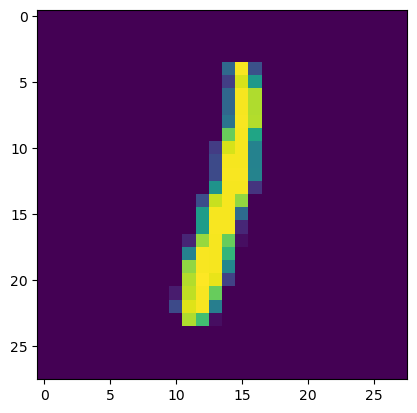

In [12]:
import matplotlib.pyplot as plt

plt.imshow(X_test[:, 2].reshape(28, 28))

In [15]:
X, Y = fetch_openml("Fashion-MNIST", return_X_y=True, as_frame=False)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3)

In [ ]:
X_train = X_train.T / 255
X_test = X_test.T / 255
Y_train = Y_train.astype(np.int16)
Y_test = Y_test.astype(np.int16)